# Week 2 Assignment — House Price Value Prediction (continuation)
DataVerse Africa Internship Cohort 3.0 — Data Science Track

**What you’ll do**: demonstrate various metrics for regression models

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib, os, pathlib


## 1) Load data

In [3]:
DATA_PATH = "housing.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## 2) EDA

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
display(df.describe(include='all'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


In [9]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Text(0.5, 1.0, 'Median House Value')

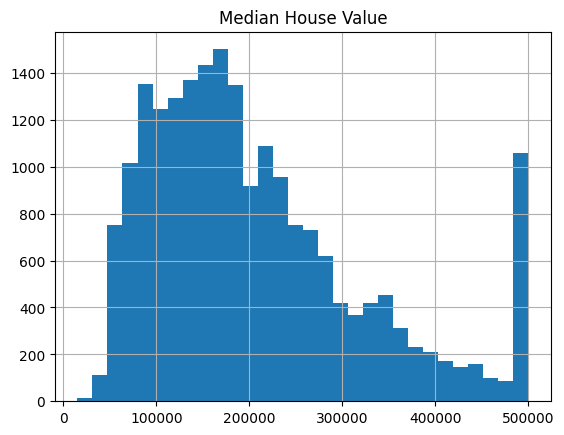

In [11]:
# Hist of target
plt.figure()
df['median_house_value'].hist(bins=30)
plt.title('Median House Value')

Text(0.5, 1.0, 'Median Income vs Median House Value')

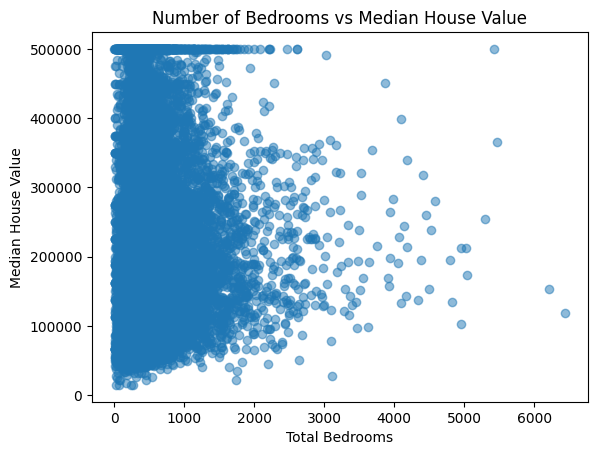

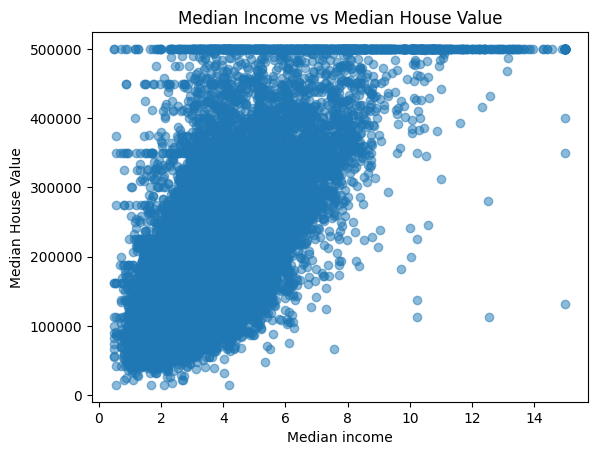

In [12]:
# Scatter: Number of Bedrooms vs Median House Value
plt.figure()
plt.scatter(df['total_bedrooms'], df['median_house_value'], alpha=0.5)
plt.xlabel('Total Bedrooms'); plt.ylabel('Median House Value'); plt.title('Number of Bedrooms vs Median House Value')

# Scatter: Median Income vs Median House Value
plt.figure()
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.xlabel('Median income'); plt.ylabel('Median House Value'); plt.title('Median Income vs Median House Value')

C:\Users\Musonda\AppData\Local\Temp\ipykernel_10784\544442865.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped, labels=df['ocean_proximity'].dropna().unique(), vert=True, showmeans=True)


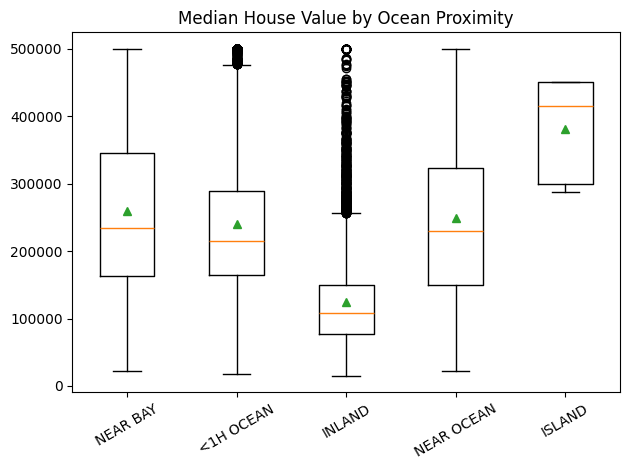

In [13]:
# Boxplot: Ocean Proximity Vs Median House Value
plt.figure()
# simple matplotlib boxplot expects sequences
grouped = [df.loc[df['ocean_proximity']==r, 'median_house_value'].dropna() for r in df['ocean_proximity'].dropna().unique()]
plt.boxplot(grouped, labels=df['ocean_proximity'].dropna().unique(), vert=True, showmeans=True)
plt.xticks(rotation=30)
plt.title('Median House Value by Ocean Proximity')
plt.tight_layout()

## 3) Train/test split and leak-safe preprocessing

In [14]:
#target variable
target = 'median_house_value'

#features
features = [c for c in df.columns if c != target]
print(features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']


In [15]:
X = df[features]
y = df[target]

In [16]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [17]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [18]:
#splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
#seperating numerical from categorical
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
print(f"numerical: {numeric_features}")
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print (f"categorical: {categorical_features}")

numerical: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
categorical: ['ocean_proximity']


In [20]:
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])


## 4) Baseline models
Linear Regression and Random Forest, using identical preprocessing.

In [23]:
def evaluate(model, X_train, y_train, X_test, y_test, name='model'):
    # Fit the model
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Basic metrics
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    # Additional metrics
    n = len(y_test)
    p = X_test.shape[1] if len(X_test.shape) > 1 else 1  

    # Adjusted R^2
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Relative RMSE (RRMSE): RMSE normalized by the mean of observed values
    rrmse = rmse / np.mean(y_test)

    # Mean Bias Error (MBE)
    mbe = np.mean(preds - y_test)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test - preds) / y_test)) * 100

    # Print results
    print(
        f"{name}: "
        f"MAE={mae:.3f}, MSE={mse:.3f}, RMSE={rmse:.3f}, RRMSE={rrmse:.3f}, "
        f"R^2={r2:.3f}, Adj_R^2={adj_r2:.3f}, MBE={mbe:.3f}, MAPE={mape:.2f}%"
    )

    return {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'RRMSE': rrmse,
        'R2': r2,
        'Adj_R2': adj_r2,
        'MBE': mbe,
        'MAPE (%)': mape
    }

linreg = Pipeline([
    ('prep', preprocess),
    ('model', LinearRegression())
])

rf = Pipeline([
    ('prep', preprocess),
    ('model', RandomForestRegressor(random_state=42, n_estimators=300))
])

scores = []
scores.append(evaluate(linreg, X_train, y_train, X_test, y_test, 'LinearRegression'))
scores.append(evaluate(rf, X_train, y_train, X_test, y_test, 'RandomForestRegressor'))

results_df = pd.DataFrame(scores)
display(results_df)


LinearRegression: MAE=50670.489, MSE=4908290571.346, RMSE=70059.193, RRMSE=0.341, R^2=0.625, Adj_R^2=0.625, MBE=-1040.847, MAPE=29.19%
RandomForestRegressor: MAE=31435.283, MSE=2373830185.146, RMSE=48721.968, RRMSE=0.237, R^2=0.819, Adj_R^2=0.818, MBE=827.964, MAPE=17.65%


,Model,MAE,MSE,RMSE,RRMSE,R2,Adj_R2,MBE,MAPE (%)
0,LinearRegression,50670.489236,4.908291e+09,70059.193339,0.34092,0.625438,0.624620,-1040.846694,29.191946
1,RandomForestRegressor,31435.282816,2.373830e+09,48721.968199,0.23709,0.818848,0.818452,827.963949,17.645081


**Observations**
- **Goodness of Fit**: Random Forest achieved R² = 0.819, indicating it explains ~82% of the target variance. Linear Regression explains only ~62%, showing a weaker fit to the data.
- **Error Magnitude**: Random Forest’s MAE and RMSE are significantly lower, indicating smaller prediction errors. Random Forest reduces average error by roughly 38–40% compared to Linear Regression.
- **Relative Error**: Random Forest has a lower RRMSE (0.237) and MAPE (17.65%), showing better relative accuracy. Linear Regression’s higher MAPE (29%) indicates greater percentage deviation from true values.
- **Bias (MBE)**: Both models show minimal bias. Linear Regression slightly underpredicts (negative MBE), while Random Forest slightly overpredicts (positive MBE).
- **Model Complexity**: Linear Regression is simpler and more interpretable, useful for understanding variable relationships. Random Forest is less interpretable but delivers superior predictive power.


**Conclusion**
- Random Forest Regressor is the stronger model in terms of predictive accuracy, error reduction, and overall fit.
- Linear Regression remains valuable as a baseline or explanatory model but lacks the flexibility to capture complex, non-linear relationships in the data.
- For production or forecasting use, Random Forest is recommended. For interpretability or when feature explainability is critical, Linear Regression may still be retained for analysis alongside the Random Forest.

In [27]:
best = max(scores, key=lambda d: d['R2'])
best_name = best['model']
best_pipe = rf if best_name == 'RandomForestRegressor' else linreg
out_path = pathlib.Path('best_baseline_model.joblib')
joblib.dump(best_pipe, out_path)
print('Saved:', out_path.resolve())


Saved: D:\SCHOOL\DataVerse Internship\Projects\Week1\flood\best_baseline_model.joblib
